<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/lecture-notes/Techcareer_07_10_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('User_Data.csv')

In [3]:
x = dataset.iloc[:,[2,3]].values # inputlar
y = dataset.iloc[:,4].values # outputlar

In [4]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scala = StandardScaler()
xtrain = scala.fit_transform(xtrain) # fit eğitme metodu
xtest = scala.transform(xtest) # sadece scala'ya al

print(xtrain[0:10, :])

[[ 1.05581344  2.10064605]
 [-0.94047247  0.50966417]
 [-0.84541124  0.30342578]
 [-0.08492137 -0.22690151]
 [-0.56022754  0.48020154]
 [-1.60590111  0.5391268 ]
 [-0.08492137  0.27396315]
 [ 1.8163033  -0.28582677]
 [-0.08492137 -0.49206516]
 [-1.32071741 -0.34475202]]


In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [7]:
y_pred = classifier.predict(xtest)

Yaptığımız model ve tahminle bunu test veri setinde deneyip model performansını ölçelim.

In [8]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(ytest,y_pred)
print('Karışıklık Matrisi : \n', conf_matrix)

Karışıklık Matrisi : 
 [[20  1]
 [ 0  4]]


In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.96


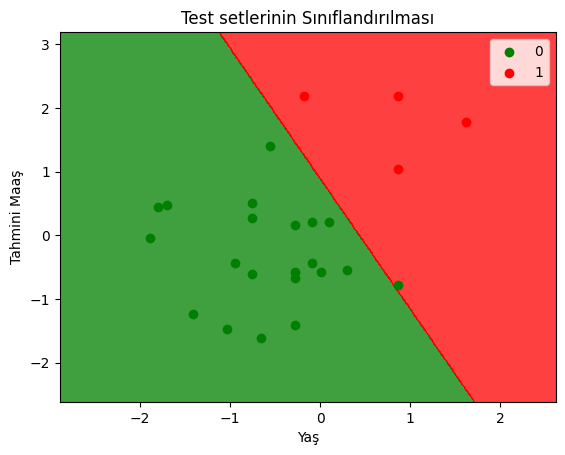

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest

X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                               stop=X_set[:,0].max()+1,
                               step=0.01),
                     np.arange(start=X_set[:,1].min()-1,
                               stop=X_set[:,1].max()+1,
                               step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('green','red')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c=[('green', 'red')[i]], label=j)
plt.title('Test setlerinin Sınıflandırılması')
plt.xlabel('Yaş')
plt.ylabel('Tahmini Maaş')
plt.legend()
plt.show()